## Blight Prediction - Detroit

### Necessary Imports

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = None
from IPython.display import Image, display
from util import *
from ast import literal_eval
import random
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

/home/madhur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Read Demolition Permits Data

In [2]:
permits = pd.read_table('detroit-demolition-permits.tsv')

In [3]:
"""
Preview the loaded dataset.
"""
permits.head(3)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,Building Permit,SINGLE FAMILY DWELLING,NaN,3006.0,1.0,1.0,0.0,799.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R1,R3,NaN,WPMT,BLD2015-04083,B-RB,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,Building Permit,I - FAM DWLG,NaN,4487.0,3.0,NaN,0.0,675.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03976,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN


In [4]:
"""
@param: start - acts as starting index into the dataset
@param: end - acts as ending index into the dataset
"""
start, end = 0, len(permits)

In [5]:
permits['incident_id'] = range(start, end)

In [6]:
"""
View the updated column ``incident_id`` which acts as a serial number for the dataset
"""
permits.head(3)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,incident_id
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,Building Permit,SINGLE FAMILY DWELLING,NaN,3006.0,1.0,1.0,0.0,799.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R1,R3,NaN,WPMT,BLD2015-04083,B-RB,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,1
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,Building Permit,I - FAM DWLG,NaN,4487.0,3.0,NaN,0.0,675.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03976,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,2


### Read Violations Data for all the buildings in consideration

In [7]:
violations = pd.read_csv('detroit-blight-violations.csv')

/home/madhur/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
violations.head(3)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:15:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Not responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:35:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."


In [9]:
"""
The ``start`` and ``end`` are used to continue
indexing from the previous dataset of Permits.

This is done as both Permits and Violations
are considered as a separate incident for blights.
"""
start += len(permits)
end += len(violations)

In [10]:
violations['incident_id'] = range(start, end)

### Read Crime Data near all the buildings in consideration

In [11]:
crimes = pd.read_csv('detroit-crime.csv')

/home/madhur/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
"""
The ``start`` and ``end`` are used to continue
indexing from the previous dataset of Permits and Violations.

This is done as all 3 Permits and Violations and Crimes
are considered as a separate incident for blights.
"""
start += len(violations)
end += len(crimes)

In [13]:
crimes['incident_id'] = range(start, end)

### Read 311 Distress Calls Data near all the buildings in consideration

In [14]:
calls = pd.read_csv('detroit-311.csv')

In [15]:
"""
The ``start`` and ``end`` are used to continue
indexing from the previous dataset of Permits, Violations & Crimes

This is done as all 4 Permits, Violations, Crimes
& distress calls are considered as a separate 
incident for blights.
"""
start += len(crimes)
end += len(calls)

In [16]:
calls['incident_id'] = range(start, end)

### Save these updated CSVs with common ``incident_ids``

In [17]:
permits.to_csv('../data/permits.csv', index=False)
violations.to_csv('../data/violations.csv', index=False)
crimes.to_csv('../data/crimes.csv', index=False)
calls.to_csv('../data/calls.csv', index=False)

### Clean Up and gather only important columns

#### 1) Violations

In [18]:
violations = pd.read_csv('../data/violations.csv')

/home/madhur/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
"""
Get Address Latitudes and Longitudes
"""
violations['ViolationAddressCoordinates'] = violations['ViolationAddress'].apply(lambda x: x.split('\n')[-1])
violations['ViolationAddressLatitude'] = violations['ViolationAddressCoordinates'].apply(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
violations['ViolationAddressLongitude'] = violations['ViolationAddressCoordinates'].apply(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)

In [20]:
violations.head(3)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,incident_id,ViolationAddressCoordinates,ViolationAddressLatitude,ViolationAddressLongitude
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133,"(42.36318237000006, -83.09167672099994)",42.363182,-83.091677
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:15:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Not responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633...",7134,"(42.429390762000025, -83.22039357799997)",42.429391,-83.220394
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:35:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707...",7135,"(42.428707459000066, -83.22754809599996)",42.428707,-83.227548


In [21]:
violations['Address'] = violations['ViolationAddress'].apply(lambda x: x.split('\n')[0])

In [22]:
"""
Gather only columns of latitude, longitude
and address from Violations
"""
temp_violations = pd.DataFrame()
temp_violations['incident_id'] = violations['incident_id']
temp_violations['lat'] = violations['ViolationAddressLatitude']
temp_violations['lon'] = violations['ViolationAddressLongitude']
temp_violations['addr'] = violations['Address']

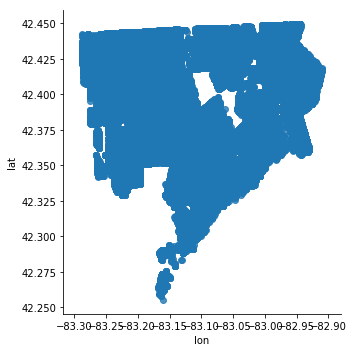

In [23]:
"""
Plot the datapoints, they should roughly form
the shape of Detroit if they have no outliers.
"""
sns.lmplot('lon', 'lat', data=temp_violations, fit_reg=False)

#### 2) Permits

In [24]:
permits = pd.read_csv('../data/permits.csv')

#### Remove those rows which have NaN values in column ``site_location``

In [25]:
permits.dropna(subset=['site_location'], inplace=True)

In [26]:
permits['Coordinates'] = permits['site_location'].map(lambda x: x.split('\n')[-1])
permits['Coordinates'].replace('', np.nan, inplace=True)
permits.dropna(subset=['Coordinates'], inplace=True)

In [27]:
"""
Get Address Latitudes and Longitudes
"""
permits['Latitude'] = permits['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
permits['Longitude'] = permits['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)

#### The Dataset clearly has an Outlier!

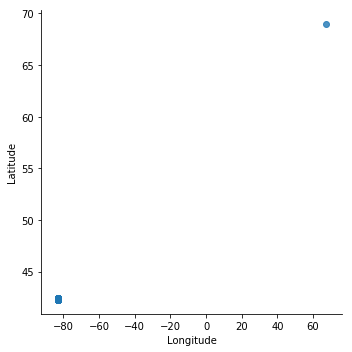

In [28]:
"""
Plot the datapoints, they should roughly form
the shape of Detroit if they have no outliers.
"""
sns.lmplot('Longitude', 'Latitude',data=permits, fit_reg=False)

#### Remove all Outliers

In [29]:
permits = permits[permits['Latitude'] < 46]

In [30]:
"""
Gather only columns of latitude, longitude
and address from Permits
"""
temp_permits = pd.DataFrame()
temp_permits['incident_id'] = permits['incident_id']
temp_permits['lat'] = permits['Latitude']
temp_permits['lon'] = permits['Longitude']
temp_permits['addr'] = permits['SITE_ADDRESS']

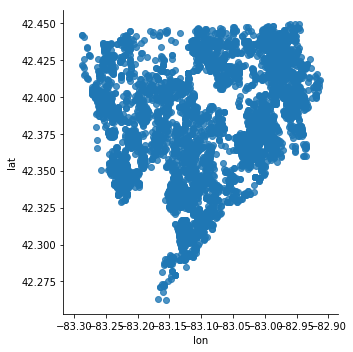

In [31]:
"""
Plot the datapoints, they should roughly form
the shape of Detroit if they have no outliers.
"""
sns.lmplot('lon', 'lat', data=temp_permits, fit_reg=False)

#### 3) Crimes

In [32]:
crimes = pd.read_csv('../data/crimes.csv')

/home/madhur/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
crimes['Coordinates'] = crimes['LOCATION'].map(lambda x: x.split('\n')[-1])
crimes['Coordinates'] = crimes['Coordinates'].replace('', np.nan)
crimes.dropna(subset=['Coordinates'], inplace=True)

In [34]:
"""
Get Address Latitudes and Longitudes
"""
crimes['Latitude'] = crimes['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
crimes['Longitude'] = crimes['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)

#### The Dataset clearly has an Outlier!

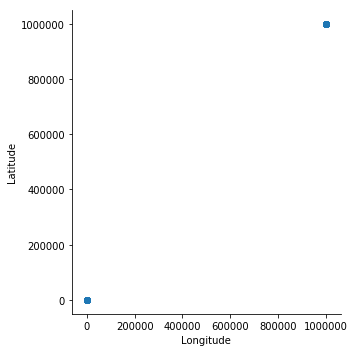

In [35]:
"""
Plot the datapoints, they should roughly form
the shape of Detroit if they have no outliers.
"""
sns.lmplot('Longitude','Latitude', data=crimes, fit_reg=False)

#### Remove all Outliers

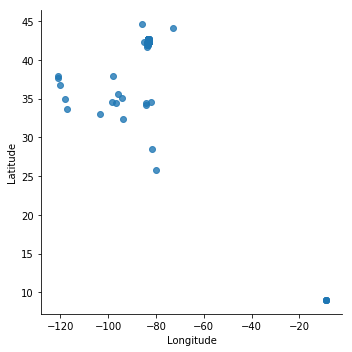

In [36]:
crimes = crimes[crimes['Latitude'] < 101]
sns.lmplot('Longitude','Latitude', data=crimes, fit_reg=False)

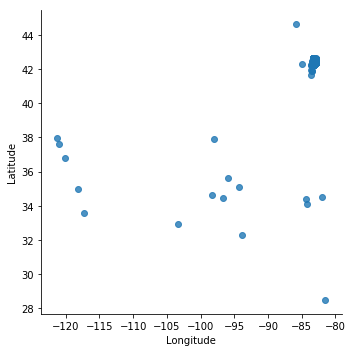

In [37]:
crimes = crimes[crimes['Longitude'] < -80.2]
sns.lmplot('Longitude','Latitude', data=crimes, fit_reg=False)

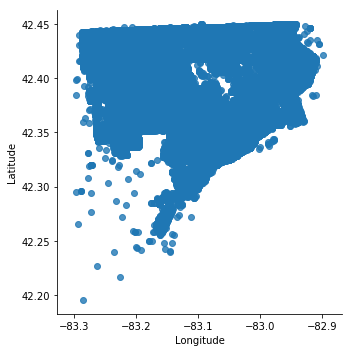

In [38]:
crimes = crimes[(crimes['Latitude'] > 42) & (crimes['Latitude'] < 42.45)]
crimes = crimes[(crimes['Longitude'] > -83.3) & (crimes['Longitude'] < -82)]
sns.lmplot('Longitude','Latitude', data=crimes, fit_reg=False)

In [39]:
temp_crimes = pd.DataFrame()

In [40]:
"""
Gather only columns of latitude, longitude
and address from Crimes
"""
temp_crimes['incident_id'] = crimes['incident_id']
temp_crimes['lat'] = crimes['Latitude']
temp_crimes['lon'] = crimes['Longitude']
temp_crimes['addr'] = crimes['ADDRESS']

In [41]:
temp_crimes.head(3)

,incident_id,lat,lon,addr
0,314937,42.3676,-83.1219,09100 PETOSKEY
1,314938,42.3725,-83.2033,00 PLYMOUTH AND MANSFIELD
2,314939,42.4339,-83.0241,00 E 7 MILE VAN DYKE


#### 4) Distress Calls

In [42]:
calls = pd.read_csv('../data/calls.csv')

In [43]:
calls['address'] = calls['address'].replace('', np.nan)
calls.dropna(subset=['address'], inplace=True)
calls.head(3)

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,incident_id
0,1516722.0,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868.0
1,1525361.0,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN,434869.0
2,1525218.0,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN,434870.0


In [44]:
def truncate_addr(x):
    p = x.lower().find('detroit')
    if 'detroit' in x.lower():
        x = x[:p]
    p = x.lower().find('michigan')
    if 'michigan' in x.lower():
        x = x[:p]
    return x.rstrip()

In [45]:
calls['address_trucated'] = calls['address'].map(truncate_addr)

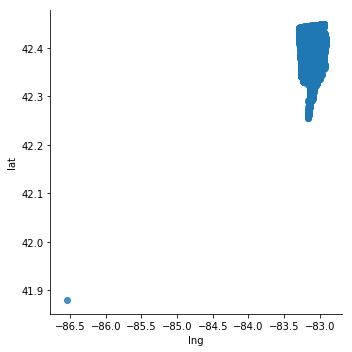

In [46]:
"""
Plot the datapoints, they should roughly form
the shape of Detroit if they have no outliers.
"""
sns.lmplot('lng', 'lat', data=calls, fit_reg=False)

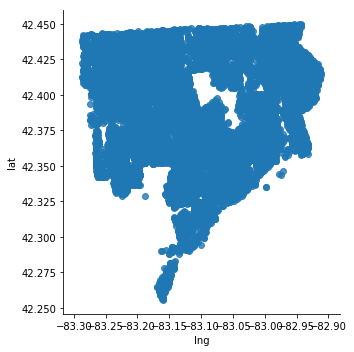

In [47]:
calls = calls[calls['lng'] > -84]
sns.lmplot('lng', 'lat', data=calls, fit_reg=False)

In [48]:
temp_calls = pd.DataFrame()

In [49]:
"""
Gather only columns of latitude, longitude
and address from Distress Calls
"""
temp_calls['incident_id'] = calls['incident_id']
temp_calls['lat'] = calls['lat']
temp_calls['lon'] = calls['lng']
temp_calls['addr'] = calls['address_trucated']

### Concatenate and Merge all 4 datasets

In [50]:
raw_incidents = pd.concat((temp_permits, temp_violations), axis=0, ignore_index=True)
raw_incidents = pd.concat((raw_incidents, temp_crimes), axis=0, ignore_index=True)
raw_incidents = pd.concat((raw_incidents, temp_calls), axis=0, ignore_index=True)

In [51]:
raw_incidents.sort_values(by=['lat', 'lon'], inplace=True)

In [52]:
raw_incidents['addr'].replace('', np.nan, inplace=True)
raw_incidents.dropna(subset=['addr'], inplace=True)

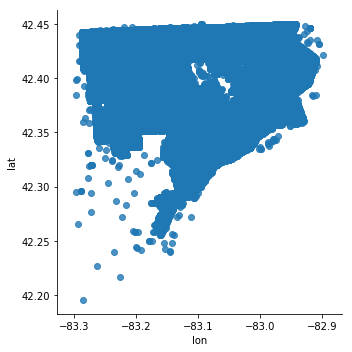

In [53]:
sns.lmplot('lon', 'lat', data=raw_incidents, fit_reg=False)

### Clean up Street Addresses

In [54]:
incidents = pd.read_csv('../data/raw_incidents.csv')

In [55]:
import string
import re

def clean_addr(s):
    s = s.lower()
    s = s.translate(str.maketrans('', ''))
    s = re.sub(r'\bstreet\b', r'st', s)
    s = re.sub(r'\broad\b', r'rd', s)
    s = re.sub(r'\bavenue\b', r'av', s)
    s = re.sub(r'\bdrive\b', r'dr', s)
    s = re.sub(r'\bboulevard\b', r'bd', s)
    s = re.sub(r'\bblvd\b', r'bd', s)
    s = re.sub(r'\bnorth\b', r'n', s)
    s = re.sub(r'\bsouth\b', r's', s)
    s = re.sub(r'\bwest\b', r'w', s)
    s = re.sub(r'\beast\b', r'e', s)
    s = re.sub(r' +', r' ', s)
    p = s.find('detroit mi')
    if p != -1:
        s = s[:p]
    p = s.find('detroitmi')
    if p != -1:
        s = s[:p]        
    s = s.strip()
    return s

In [56]:
incidents['clean_addr'] = incidents['addr'].map(clean_addr)

In [57]:
"""
Forms a cluster of all the incidents reported
for a particular address
"""
def get_clusters(df):
    count = 0
    table = {}
    cluster = []
    for addr in df.loc[:,'clean_addr']:
        if addr in table.keys():
            cluster.append(table[addr])
        else:
            count += 1
            table[addr] = count
            cluster.append(count)
    df['cluster'] = np.array(cluster)
    return df, count

In [58]:
incidents, num_clusters = get_clusters(incidents)

In [59]:
incidents.sort_values(by=['clean_addr'], ascending=True, inplace=True)

In [60]:
incidents = incidents[incidents['clean_addr'] != '00 detroit']

In [61]:
"""
Checks if 2 addresses are same after cleaning up

"""
def is_same_addr(x, y):
    xt = x.split()
    yt = y.split()
    xs = set(xt)
    ys = set(yt)
    
    """
    First Matches up with the Street Number
    """
    flag_start_with_number = xt[0].isdigit() and yt[0].isdigit()
    flag_number_match = (xt[0] == yt[0])
    
    num_tokens_match = len(xs.intersection(ys))
    
    """
    Checks for spelling mistakes
    """
    flag_edit_dist_ok = (edit_distance(x, y, sub_cost=2) < 7)
    
    if flag_start_with_number:
        if flag_number_match and num_tokens_match >= 1 and flag_edit_dist_ok:
            return True
    else:
        if num_tokens_match >= 1 and flag_edit_dist_ok:
            return True
    
    return False

In [62]:
"""
Each building is assigned the same value of cluster
after checking if their cleaned-up addresses are same!
"""
def refine_clusters(df):
    clusters = {}
    
    row0 = df.iloc[0, :]
    prev_cluster = row0['cluster']
    prev_addr = row0['clean_addr']
    row0_id =row0['incident_id']
    clusters[row0_id] = prev_cluster

    for index, row in df.iterrows():
        addr = row['clean_addr']
        cluster = row['cluster']
        id = row['incident_id']
        
        if id == row0_id:
            continue
        
        if cluster != prev_cluster:
            if is_same_addr(addr, prev_addr):
                cluster = prev_cluster
            else:
                prev_cluster = cluster
                prev_addr = addr
        
        clusters[id] = cluster
    
    df['refined_cluster'] = df['incident_id'].map(lambda x: clusters[x])
    return df

In [63]:
incidents = refine_clusters(incidents)

In [64]:
incidents.sort_values(by=['lat', 'lon'], inplace=True)

In [65]:
unique_clusters = incidents['refined_cluster'].unique()

In [66]:
cluster_remap = dict(zip(unique_clusters, range(len(unique_clusters))))

In [67]:
incidents['remapped_cluster'] = incidents['refined_cluster'].map(lambda x: cluster_remap[x])

In [68]:
incidents.to_csv('../data/incidents.csv', index=False)

### Get Coordinates of Buildings (for plotting)

In [69]:
import geopy
from geopy.distance import vincenty

In [70]:
eps = 0.000075

In [71]:
"""
Returns the bottom-left co-ordinates
and the top-right co-ordinates for
the each building.
"""
def get_buildings(df):
    buildings = []
    
    row0 = df.iloc[0, :]
    row0_id =row0['incident_id']
    
    lat = row0['lat']
    lon = row0['lon']
    
    current_cluster = row0['remapped_cluster']
    current_addr = row0['addr']
    bottom_left = [lat, lon]
    top_right = [lat, lon]
    incident_ids = [row0_id]
    num = 1

    for index, row in df.iterrows():
        id = row['incident_id']
        cluster = row['remapped_cluster']
        addr = row['addr']
        lat = row['lat']
        lon = row['lon']
        
        if id == row0_id:
            continue
        
        if cluster == current_cluster:
            num += 1
            incident_ids.append(id)
            if lat < bottom_left[0] and lon < bottom_left[1]:
                bottom_left = [lat, lon]
            if lat > top_right[0] and lat > top_right[1]:
                top_right = [lat, lon]
            
        else:
            bottom_left[0] -= eps
            bottom_left[1] -= eps
            top_right[0] += eps
            top_right[1] += eps
            this = [bottom_left, top_right, current_addr, current_cluster, num, incident_ids]
            buildings.append(this)
            
            current_cluster = cluster
            current_addr = addr
            bottom_left = [lat, lon]
            top_right = [lat, lon]
            incident_ids = [id]
            num = 1
            
    df_buildings= pd.DataFrame(buildings)
    df_buildings.columns = ['bottom_left', 'top_right', 'addr', 'cluster', 'num', 'incident_ids']
    df_buildings['building_id'] = range(len(buildings))
    
    return df_buildings

In [72]:
incidents.sort_values(by=['remapped_cluster'], inplace=True)

In [73]:
buildings = get_buildings(incidents)
buildings.to_csv('../data/buildings.csv', index=False)
buildings = pd.read_csv('../data/buildings.csv')

In [74]:
buildings['incident_ids'] = buildings['incident_ids'].map(literal_eval)

In [75]:
buildings.head(3)

,bottom_left,top_right,addr,cluster,num,incident_ids,building_id
0,"[42.255267051000068, -83.161064993999986]","[42.255811, -83.16050500000003]",26585 OUTER DRIVE,0,2,"[53453.0, 446027.0]",0
1,"[42.256026999999996, -83.1607722]","[42.256177, -83.1606222]",3808 S Bassett St,1,1,[446640.0],1
2,"[42.256281200000004, -83.160299]","[42.25643120000001, -83.160149]",3795 S. Bassett,2,1,[446574.0],2


### Extract Meaningful Features for prediction

In [76]:
def get_incident_to_building_mapping(buildings):
    mapping = {}
    for index, row in buildings.iterrows():
        for y in row['incident_ids']:
            if y not in mapping:
                mapping[y] = [row['building_id']]
            else:
                mapping[y].append(row['building_id'])
    return mapping

In [77]:
incident_to_building_mapping = get_incident_to_building_mapping(buildings)

In [91]:
pre_train_df = pd.read_csv('../data/train.csv')
all_df = pd.read_csv('../data/all_incidents.csv')

train_ids = pre_train_df['building_id'].tolist()
train_df = all_df[all_df.building_id.isin(train_ids)]
train_df_labeled = pd.merge(pre_train_df, train_df, on='building_id', how='left')

In [92]:
train_df_labeled.head(3)

,building_id,blighted,call_count,call_avg_rating,call_other_type_count,call_ticket_archived_count,call_ticket_closed_count,call_ticket_acknowledged_count,call_ticket_open_count,call_illegal_dumping_count,call_tree_count,call_running_water_count,call_clogged_drain_count,call_potholes_count,call_traffic_sign_count,call_water_main_break_count,call_fire_hydrant_count,call_abandoned_vehicle_count,call_manhole_cover_count,call_traffic_signal_count,call_trash_bulk_waste_count,call_dpw_debris_removal_count,call_st_light_pole_down_count,call_curbside_solid_waste_count,call_dpw_others_count,call_trash_improper_placement_count,call_res_snow_removal_count,call_graffiti_count,crime_count,crime_other_crime_count,crime_traffic_violations-motorcycle_violations_count,crime_assault_count,crime_larceny_count,crime_damage_to_property_count,crime_aggravated_assault_count,crime_burglary_count,crime_stolen_vehicle_count,crime_traffic_violations-driving_on_suspended_count,crime_fraud_count,crime_robbery_count,crime_dangerous_drugs_count,crime_obstructing_judiciary_count,crime_weapons_offenses_count,crime_escape_count,crime_solicitation_count,crime_bribery_count,crime_arson_count,crime_ouil_dispose_of_vehicle_to_avoid_forfeiture_count,crime_runaway_count,crime_stolen_property_count,crime_obstructing_the_police_count,crime_family_offense_count,crime_homicide_count,crime_other_burglary_count,crime_health-safety_count,crime_kidnaping_count,crime_forgery_count,crime_extortion_count,crime_public_peace_count,crime_environment_count
0,96,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,290,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
train_df_labeled.to_csv('../data/train_feat.csv', index=False)

### Prediction : Logistic Regression

In [95]:
top_20_features = ['crime_count','crime_traffic_violations-motorcycle_violations_count','call_avg_rating','call_count','crime_larceny_count','crime_assault_count','crime_damage_to_property_count','crime_aggravated_assault_count','crime_stolen_vehicle_count','call_ticket_archived_count','call_ticket_closed_count','crime_traffic_violations-driving_on_suspended_count','crime_burglary_count','crime_fraud_count','crime_robbery_count','call_tree_count','crime_dangerous_drugs_count','call_running_water_count','call_potholes_count','call_illegal_dumping_count']

In [97]:
logreg = linear_model.LogisticRegression(C=1e5)

In [98]:
"""
Load Dataset for Classification
"""
X = train_df_labeled.drop(['building_id', 'blighted'], axis=1)
y = train_df_labeled['blighted']

In [102]:
X[top_20_features].to_csv('../data/input.csv', index=False)
y.to_csv('../data/output.csv', index=False)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1027)

In [104]:
x_train = X_train[top_20_features]
x_test = X_test[top_20_features]

In [108]:
logreg.fit(x_train, y_train)
print("Accuracy on test data is "+str(logreg.score(x_test, y_test)*100)+"%")

Accuracy on test data is 67.4089678002%
